# CAPSTONE PROJECT

# NAME OF PROJECT: SHOEBRANDS PRICE AND RATINGS ANALYSIS

# Insights of the project:

The project aims at predicting shoes prices and ratings of the shoes of various brands. There are a total of 6 brands. These are:
1. Nike Shoes.
2. Columbia Shoes.
3.  WoodlandWorldWide Shoes.
4. Puma Shoes.
5. Skechers Shoes.
6. Adidas Shoes. 
The websites of these brands have been scraped 


Importing the necessary libraries as well as file which was scraped and stored as CapstoneFile.csv in my PC.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [181]:
df=pd.read_csv('CapstoneFile.csv')
df

,Unnamed: 0,Shoes_names,shoes_category,shoes_color,shoes_price,Color1,Color2,Color3,Quantity,Ratings,Reviews,Counts,StyleCode
0,0,Air Jordan 1 Low SE,Women's Shoes,2 Colours,10295.0,: Light Bone,Phantom,Coconut Milk,1,4.800000,0.0,13.0,FZ3967-072
1,1,Nike Court Vision Low,Men's Shoes,1 Colour,5695.0,: Light Silver,Black,Deep Royal Blue,1,0.000000,1.0,13.0,FB8886-001
2,2,Nike Dunk Low SE,Women's Shoes,1 Colour,9695.0,: Baroque Brown,Velvet Brown,Deep Jungle,1,0.000000,0.0,11.0,FQ8174-237
3,3,Nike Air Max 1,Men's shoes,5 Colours,12795.0,: Burgundy Crush,Plum Eclipse,Burgundy Crus,1,3.210811,0.0,13.0,FB8876-600
4,4,Air Jordan 1 Low SE,Women's Shoes,1 Colour,10295.0,: Sail,Light Orewood Brown,White,1,0.000000,0.0,NaN,FQ8075-133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,510,BLACK wedge slipp,for women,All Colours,3897.0,-,NaN,NaN,1,3.210811,NaN,NaN,None
511,511,Woods black strappy sandal,for women,All Colours,4797.0,BLACK,NaN,NaN,1,3.210811,NaN,9.0,None
512,512,Woodland LGREY 2 loafers,for women,All Colours,1257.0,TURQUOISE,NaN,NaN,1,3.210811,NaN,13.0,None
513,513,Beige casual sneak,for women,All Colours,447.0,FUSCHIA,NaN,NaN,1,3.210811,NaN,9.0,None


In [182]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# EXPLANATORY DATA ANALYSIS

In [4]:
df.head()

,Shoes_names,shoes_category,shoes_color,shoes_price,Color1,Color2,Color3,Quantity,Ratings,Reviews,Counts,StyleCode
0,Air Jordan 1 Low SE,Women's Shoes,2 Colours,10295.0,: Light Bone,Phantom,Coconut Milk,1,4.800000,0.0,13.0,FZ3967-072
1,Nike Court Vision Low,Men's Shoes,1 Colour,5695.0,: Light Silver,Black,Deep Royal Blue,1,0.000000,1.0,13.0,FB8886-001
2,Nike Dunk Low SE,Women's Shoes,1 Colour,9695.0,: Baroque Brown,Velvet Brown,Deep Jungle,1,0.000000,0.0,11.0,FQ8174-237
3,Nike Air Max 1,Men's shoes,5 Colours,12795.0,: Burgundy Crush,Plum Eclipse,Burgundy Crus,1,3.210811,0.0,13.0,FB8876-600
4,Air Jordan 1 Low SE,Women's Shoes,1 Colour,10295.0,: Sail,Light Orewood Brown,White,1,0.000000,0.0,NaN,FQ8075-133


In [6]:
df.tail()

,Shoes_names,shoes_category,shoes_color,shoes_price,Color1,Color2,Color3,Quantity,Ratings,Reviews,Counts,StyleCode
510,BLACK wedge slipp,for women,All Colours,3897.0,-,NaN,NaN,1,3.210811,NaN,NaN,None
511,Woods black strappy sandal,for women,All Colours,4797.0,BLACK,NaN,NaN,1,3.210811,NaN,9.0,None
512,Woodland LGREY 2 loafers,for women,All Colours,1257.0,TURQUOISE,NaN,NaN,1,3.210811,NaN,13.0,None
513,Beige casual sneak,for women,All Colours,447.0,FUSCHIA,NaN,NaN,1,3.210811,NaN,9.0,None
514,BLACK wedge heel sandals,for women,All Colours,1647.0,BLACK,NaN,NaN,1,3.210811,NaN,10.0,None


In [7]:
df.columns

Index(['Shoes_names', 'shoes_category', 'shoes_color', 'shoes_price', 'Color1',
       'Color2', 'Color3', 'Quantity', 'Ratings', 'Reviews', 'Counts',
       'StyleCode'],
      dtype='object')

In [8]:
df.columns.to_list()

['Shoes_names',
 'shoes_category',
 'shoes_color',
 'shoes_price',
 'Color1',
 'Color2',
 'Color3',
 'Quantity',
 'Ratings',
 'Reviews',
 'Counts',
 'StyleCode']

In [183]:
df['Ratings']=df['Ratings'].astype(int)
df['Ratings'].dtype

dtype('int32')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Shoes_names     515 non-null    object 
 1   shoes_category  515 non-null    object 
 2   shoes_color     505 non-null    object 
 3   shoes_price     511 non-null    float64
 4   Color1          514 non-null    object 
 5   Color2          280 non-null    object 
 6   Color3          225 non-null    object 
 7   Quantity        515 non-null    int64  
 8   Ratings         515 non-null    int32  
 9   Reviews         196 non-null    float64
 10  Counts          420 non-null    float64
 11  StyleCode       515 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 46.4+ KB


In [146]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")


PUMA 22 FH Rubber Unisex Cricket Shoes                            8
Nike Air Force 1 '07                                              7
Superstar Shoes                                                   4
Ultimashow Shoes                                                  4
Brown slipp                                                       4
                                                                 ..
Columbia Men BLACK ESCAPE THRIVE ULTRA                            1
Columbia Women Red TRAILSTORM MID Water Resistant Shoes           1
Columbia Women Purple Plateau Water Resistant Shoes               1
Columbia Women Black PEAKFREAK X2 OUTDRY (Complete Waterproof)    1
Beige casual sneak                                                1
Name: Shoes_names, Length: 426, dtype: int64


Men                          137
for women                    100
Women                         30
Men's Shoes                   25
Women's Shoes                 16
                            ... 
Golf Sh

In [ ]:
We can note different value counts here. 

# Checking for null values


In [147]:
df.isnull().sum()

Shoes_names         0
shoes_category      0
shoes_color        10
shoes_price         4
Color1              1
Color2            235
Color3            290
Quantity            0
Ratings             0
Reviews           319
Counts             95
StyleCode           0
dtype: int64

<AxesSubplot:>

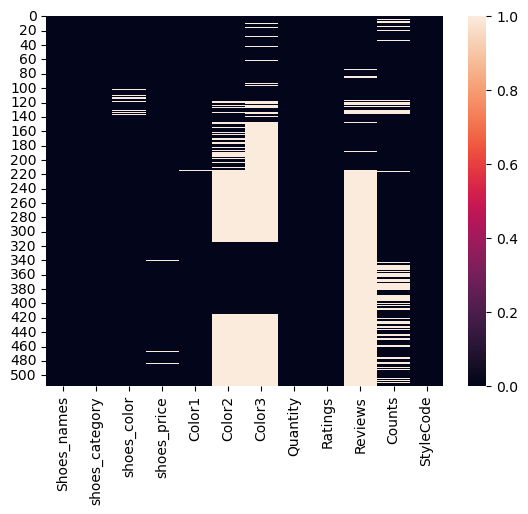

In [12]:
sns.heatmap(df.isnull())

In [184]:
df['shoes_color']=df['shoes_color'].fillna(df['shoes_color'].mode()[0])

In [185]:
df['shoes_price']=df['shoes_price'].fillna(df['shoes_price'].mean())

In [186]:
df['Color1']=df['Color1'].fillna(df['Color1'].mode()[0])

In [188]:
df['Color2']=df['Color2'].fillna(df['Color2'].mode()[0])

In [189]:
df['Color3']=df['Color3'].fillna(df['Color3'].mode()[0])

In [191]:
df['Counts']=df['Counts'].fillna(df['Counts'].mean())

In [192]:
df['Reviews']=df['Reviews'].fillna(df['Reviews'].mean())

In [193]:
df['Ratings']=df['Ratings'].fillna(df['Ratings'].mean())

In [194]:
df.isnull().sum()

Shoes_names       0
shoes_category    0
shoes_color       0
shoes_price       0
Color1            0
Color2            0
Color3            0
Quantity          0
Ratings           0
Reviews           0
Counts            0
StyleCode         0
dtype: int64

Though I could have dropped the Color2 and Color3 columns because of maximum NaN values, I have kept them as there are few 
columns. 

# Finally, there are no null values in the dataset, and we can proceed with further analysis

# First target variable 'Shoes_price' unique values¶

In [15]:
df['shoes_price'].nunique()

196

Shoes price is the label or target variable and having 196 unique values and the total rows are approximately
500.  So we can consider this as a regression based problem and can try various regression algorithms
like linear regression, decision tree, randomforest and other regressor algorithms


# Second target variable 'Ratings' unique values

In [16]:
df['Ratings'].nunique()

4

In [213]:
df['Ratings'].unique()

array([4, 0, 3, 5])

The Ratings unique values clearly indicate that there is a class difference or bias in the dataset. So, here we need to 
apply various classifiers like MultinomialNB, decisiontree classifers, extra treesclassifier, AdaBoosting classifier,
and other algorithms.

# The Ratings unique values clearly indicate that there is a class difference or bias in the dataset. So, here we need to 
apply various classifiers like MultinomialNB, decisiontree classifers, extra treesclassifier, AdaBoosting classifier,
and other algorithms.

# Unique value table of the different variables of the dataset¶

In [98]:
df.nunique().to_frame("ShoesBrands Unique Values")

,ShoesBrands Unique Values
Shoes_names,426
shoes_category,130
shoes_color,37
shoes_price,196
Color1,183
Color2,98
Color3,63
Quantity,1
Ratings,4
Reviews,82


# Statistical Summary of the dataset¶

In [99]:
df.describe()

,shoes_price,Quantity,Ratings,Reviews,Counts
count,5.150000e+02,515.0,515.000000,515.000000,515.000000
mean,4.356083e+07,1.0,2.968932,361.561224,8.540476
std,4.543773e+08,0.0,0.870510,778.331077,4.522385
min,1.000000e+00,1.0,0.000000,0.000000,1.000000
25%,5.170000e+02,1.0,3.000000,47.500000,7.000000
50%,3.749000e+03,1.0,3.000000,361.561224,8.540476
75%,7.999000e+03,1.0,3.000000,361.561224,12.000000
max,9.799140e+09,1.0,5.000000,7207.000000,30.000000


<AxesSubplot:>

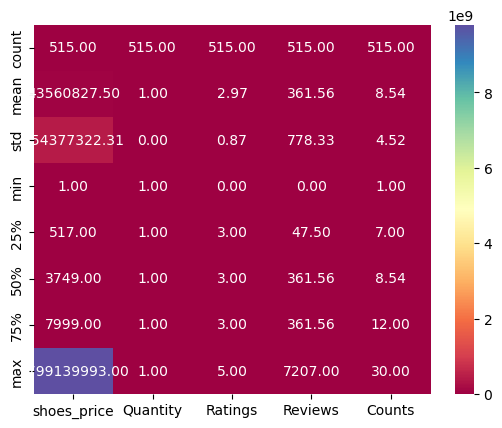

In [100]:
sns.heatmap(df.describe(), annot=True, fmt='0.2f',  linecolor='black', cmap='Spectral')

In [ ]:
OBSERVATIONS:
    1. All row counts are equal. Therefore, no missing values.
    2. No negative values, so the data summary is excellent.
    3. Skewness: There is large difference between the mean and median of shoes_price but other all columns have equal values. So
       only shoes_price has skewness. 
    4. Outliers: Again, we can note that there is very large difference between the 75th percentile and max values for all columns
       except Quantity. There are outliers in shoes_price, Ratings, Reviews as well as Counts columns.
    5. Standard deviation is 0 for Quantity and less than 1 for Ratings. Shoes_price has a very high standard deviation 
       indicating that the data is widely spread. The Counts column has a SD of just 4. 
    6. The above statistical method shows 25th percentile and minimum values also.
 

# Separating the categorical as well as numerical data for calculating zscore and skewness. 

In [101]:
categorical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)

categorical columns: ['Shoes_names', 'shoes_category', 'shoes_color', 'Color1', 'Color2', 'Color3', 'StyleCode']


In [102]:
numerical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['shoes_price', 'Quantity', 'Ratings', 'Reviews', 'Counts']


# Graphical Explanatory Data Analysis
Univariate Analysis using Countplots¶

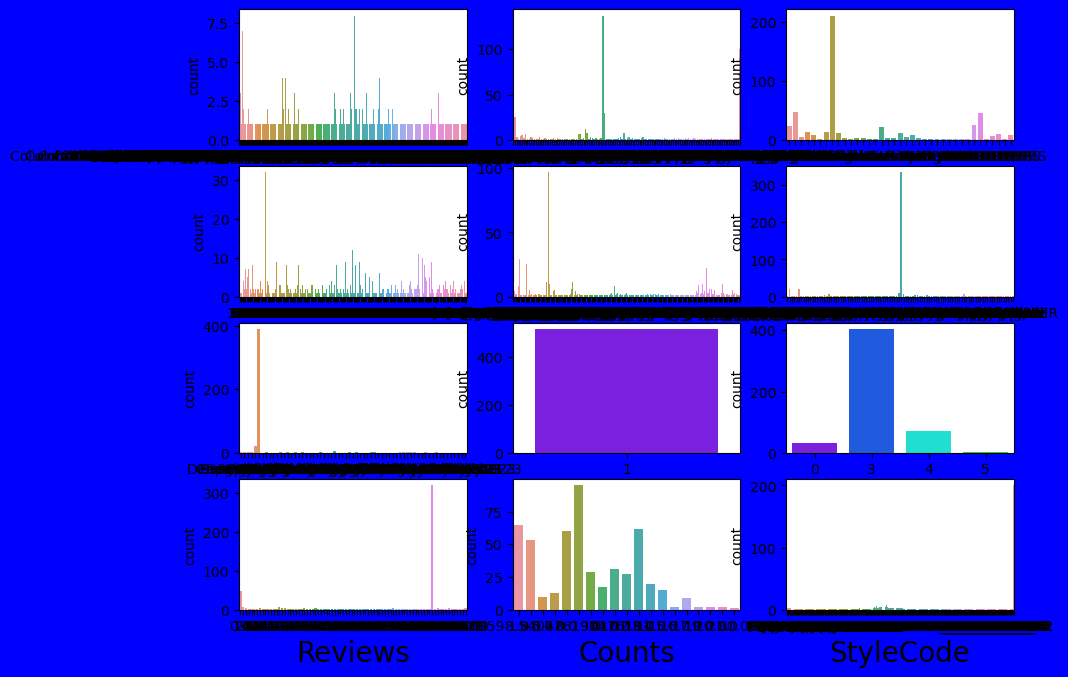

In [103]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,20),facecolor='blue')
plotnum=1
for col in df:
    if plotnum<=19:
        plt.subplot(10,3,plotnum)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

The count plot shows counts of all variables.

Minimum shoes_price: 1.0
Maximum shoes_price: 9799139993.0
Average shoes_price: 43560827.5


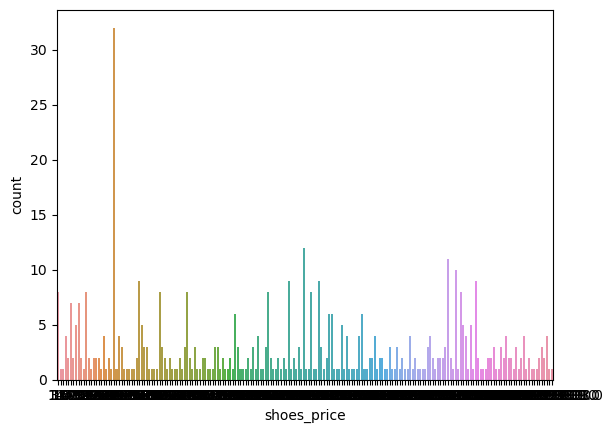

In [28]:
sns.countplot(x='shoes_price', data=df)


The shoes_price column shows many prices.

Men                          137
for women                    100
Women                         30
Men's Shoes                   25
Women's Shoes                 16
                            ... 
Golf Shoes (Wide)              1
MG High-Top Football Boot      1
Peacoat-Red Dahlia             1
Dark Denim-Puma White          1
Puma Black-Puma Team Gold      1
Name: shoes_category, Length: 130, dtype: int64


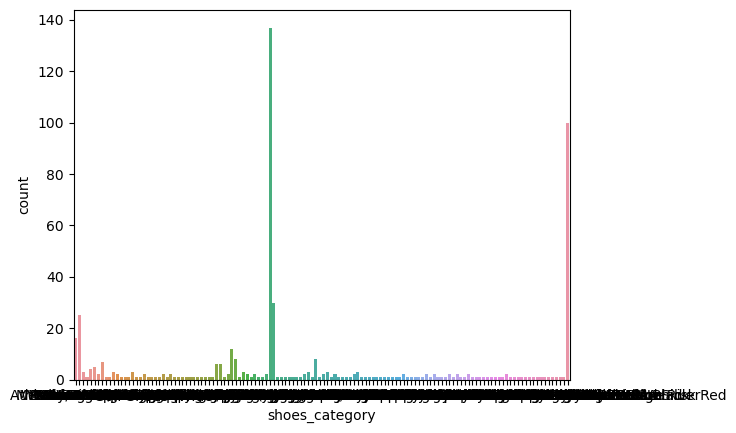

In [17]:
bx=sns.countplot(x='shoes_category', data=df) #Countplot for categorical data
print(df['shoes_category'].value_counts())

All Colours        210
1 Colour            47
2 COLORS            46
3 COLORS            25
2 Colours           24
Black               22
2 colours           14
3 Colours           13
Grey                12
3 colours           11
6 COLORS            10
4 Colours            9
8 COLORS             8
Blue                 8
4 COLORS             7
5 Colours            5
Brown                5
5 colours            4
White                4
Red                  3
8 colours            3
Green                3
4 colours            3
6 Colours            2
Orange               2
BLACK                2
9 COLORS             2
5 COLORS             2
9 colours            1
Purple               1
BROWN                1
Multi                1
BLUE                 1
GREEN                1
3 colours · new      1
7 colours · new      1
PURPLE               1
Name: shoes_color, dtype: int64


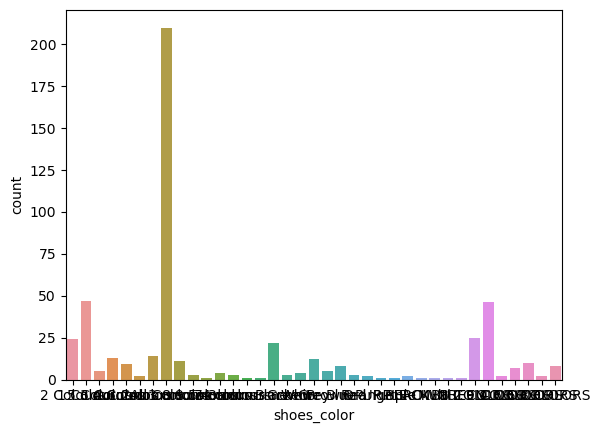

In [94]:
bx=sns.countplot(x='shoes_color', data=df) #Countplot for categorical data
print(df['shoes_color'].value_counts())

In [ ]:
The shoes_color count plot gives the above information.

In [ ]:
sns.countplot(x='Counts', data=df) #Countplot for categorical data
print(df['Counts'].value_counts())
plt.xticks(rotation=90)

In [ ]:
The Counts graph shows counts of different colors of the shoes

<AxesSubplot:xlabel='Ratings', ylabel='count'>

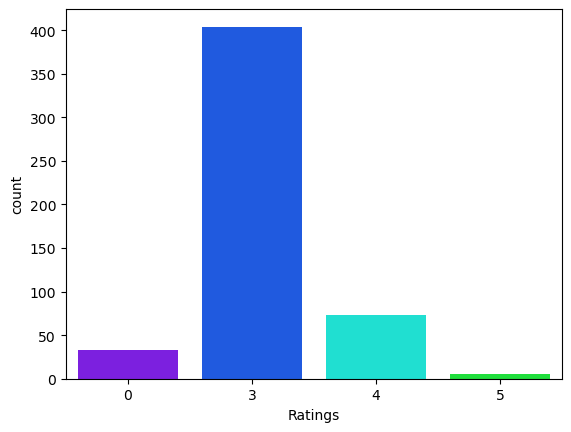

In [104]:
sns.countplot(x='Ratings', data=df)

The Ratings column shows 4 ratings categories as shown in the plot.

# Histograms as univariate analysis

array([[<AxesSubplot:title={'center':'shoes_price'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Ratings'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Counts'}>, <AxesSubplot:>]],
      dtype=object)

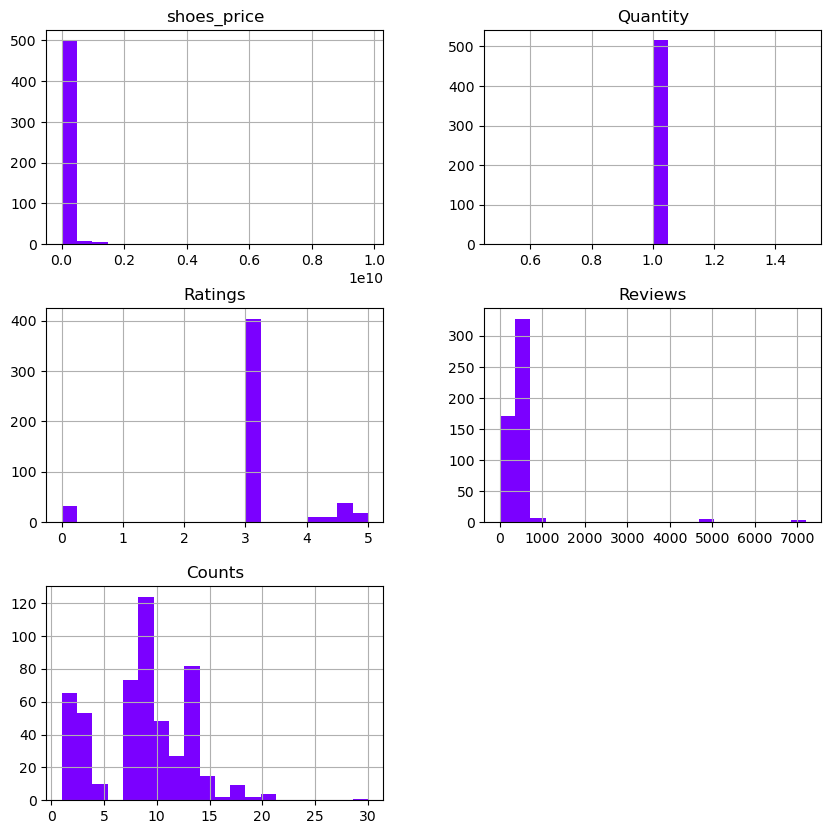

In [95]:
df.hist(bins=20, figsize=(10, 10))

In [ ]:
The histogram plot shows right-sided skewness in all columns except the Quantity column which is normal. The Ratings column
shows a slight left-sided skewness. Counts also has a near normal curve with slight right skewness.

# CHECKING FOR OUTLIERS USING ZSCORE METHOD

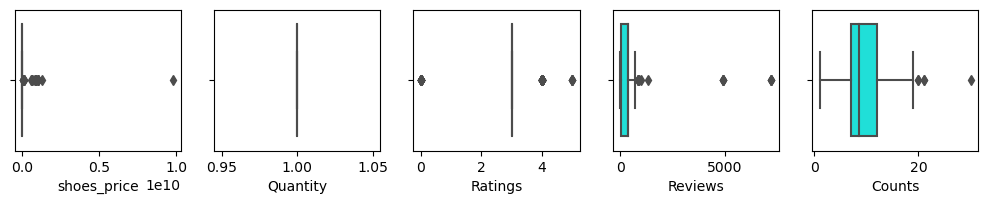

In [137]:
plt.figure(figsize=(15, 15))
plotnumber=1
for i in numerical_col:
    if plotnumber<=27:
        ax=plt.subplot(7, 6, plotnumber)
        sns.boxplot(df[i], palette='hsv')
    plotnumber+=1
plt.show()

We can see that there are outliers in all columns except Quantity which has no outliers. We will try to reduce them with the
Z score method

In [195]:
attributes=df[['shoes_price', 'Ratings', 'Reviews', 'Counts']]

In [196]:
from scipy.stats import zscore
z=np.abs(zscore(attributes))
z

,shoes_price,Ratings,Reviews,Counts
0,0.095940,1.185593,0.464986,0.987059
1,0.095950,3.413882,0.463700,0.987059
2,0.095941,3.413882,0.464986,0.544384
3,0.095934,0.035724,0.464986,0.987059
4,0.095940,3.413882,0.464986,0.000000
...,...,...,...,...
510,0.095954,0.035724,0.000000,0.000000
511,0.095952,0.035724,0.000000,0.101710
512,0.095960,0.035724,0.000000,0.987059
513,0.095962,0.035724,0.000000,0.101710


In [109]:
np.where(z>3)

(array([  1,   2,   4,   5,   7,   8,   9,  11,  12,  13,  15,  16,  17,
         19,  20,  21,  23,  25,  27,  31,  50,  51,  53,  55,  57,  61,
         80,  81,  82,  84,  86,  88,  92, 100, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 163], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0],
       dtype=int64))

In [33]:
z.iloc[1,1] # values >3 have outliers showing value greater than 3.

3.295917002270589

In [34]:
z.iloc[163,0]

21.491091077530356

In [197]:
df1=df[(z<3).all(axis=1)]

In [198]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df1.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old Dataframe 515
New Dataframe 472
DataLoss percentage: 8.349514563106796


There is 8% dataloss,which is less than 10% dataloss

In [199]:
df=df1

# Bivariate Analysis

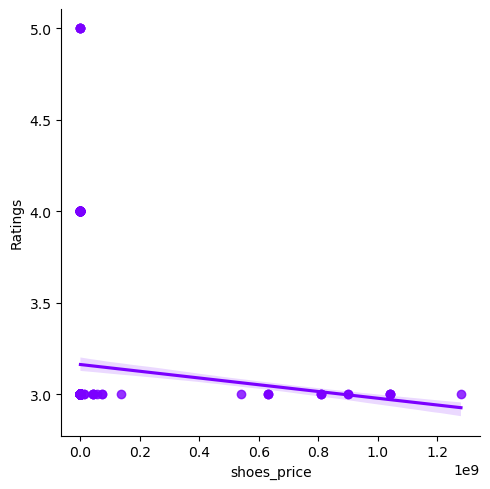

In [113]:
sns.lmplot(x='shoes_price', y='Ratings', data=df)

The LM plot shows Ratings is negatively related to shoes_price but there are few points passing the best line of fit. 

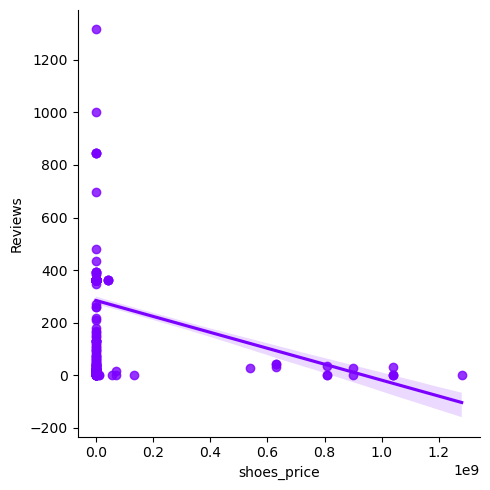

In [73]:
sns.lmplot(x='shoes_price', y='Reviews', data=df)

In [ ]:
Even with Reviews the shoes_price is negatively correlated and there are some datapoints passing the line of fit.

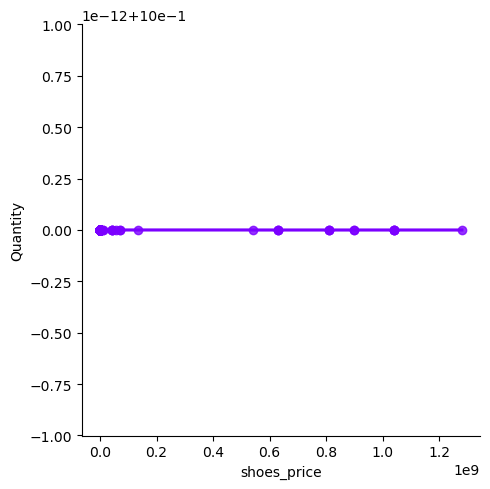

In [107]:
sns.lmplot(x='shoes_price', y='Quantity', data=df)

Quantity has a neutral relationship with shoes_price.

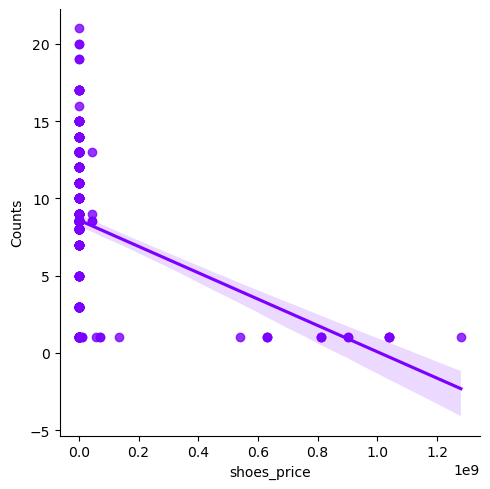

In [74]:
sns.lmplot(x='shoes_price', y='Counts', data=df)

Counts also shows an inversely related relationship with shoes_price

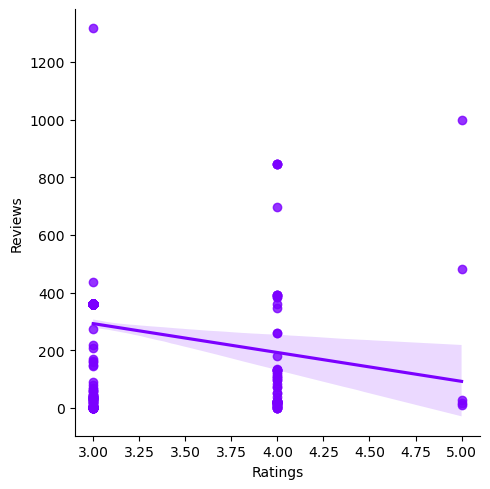

In [114]:
sns.lmplot(x='Ratings', y='Reviews', data=df)

Ratings and Reviews are negatively correlated with each other and just 3  points touching the best line of fit.

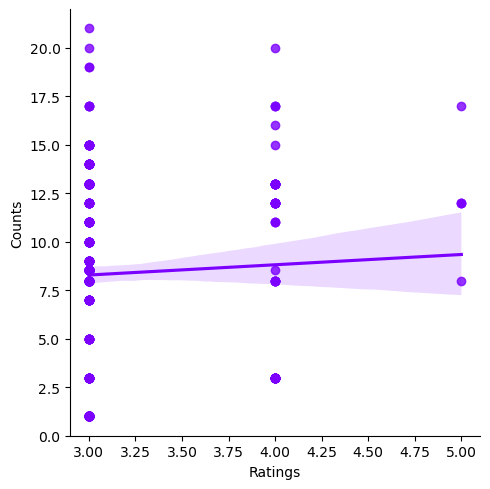

In [115]:
sns.lmplot(x='Ratings', y='Counts', data=df)

Ratings and Counts have a positive correlation but not a strong one and there are just few points touching the best line of bit.

<AxesSubplot:xlabel='Ratings', ylabel='count'>

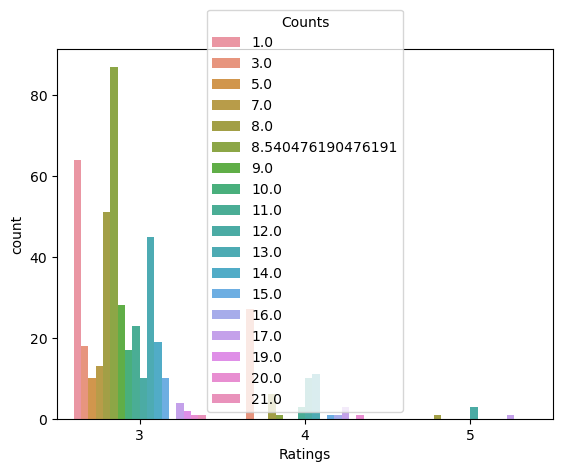

In [109]:
sns.countplot(x='Ratings',data=df, hue='Counts')

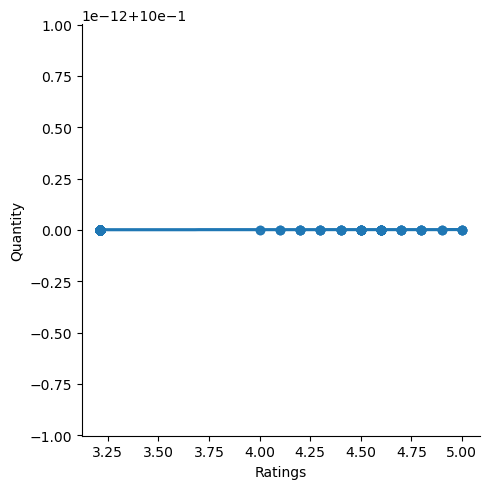

In [41]:
sns.lmplot(x='Ratings', y='Quantity', data=df)

In [ ]:
Here, one can see that both are neutrally correlated and all the points pass through the line of best fit.

In [ ]:
sns.pairplot(data=df) # showing as error or hanging

# Checking skewness for the data

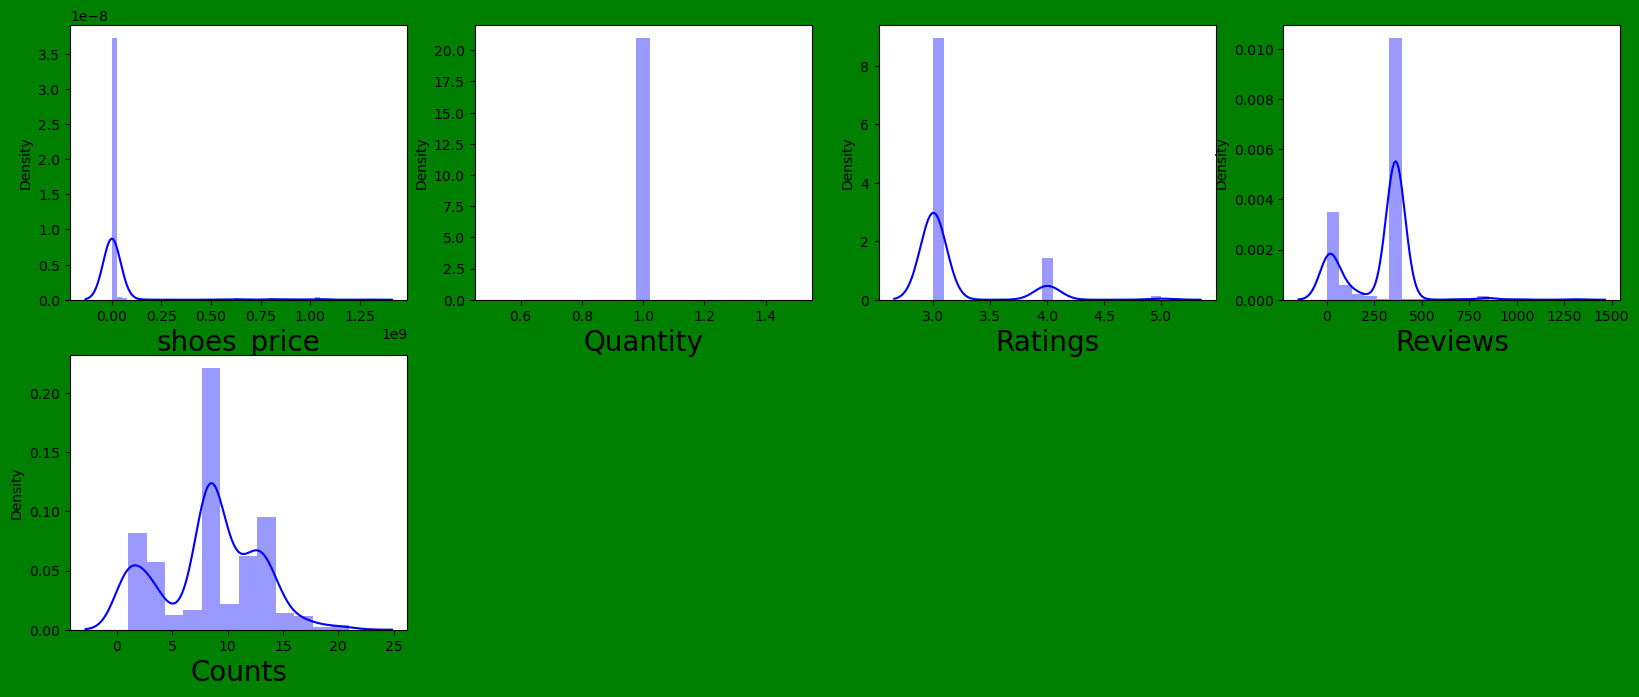

In [117]:
plt.figure (figsize=(20, 25), facecolor='green') #despite the fact that distplot will be depricated, am trying out this. 
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

There is right-sided skewness present in shoes_price column and Ratings column. We will try to reduce them 

In [200]:
df.skew()

shoes_price    6.002277
Quantity       0.000000
Ratings        2.410439
Reviews        0.196566
Counts        -0.151384
dtype: float64

In [201]:
skew=['shoes_price', 'Ratings']

In [202]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [185]:
#df['shoes_price']=np.sqrt(df['shoes_price'])

In [186]:
#df['shoes_price']=np.cbrt(df['shoes_price'])

In [187]:
#df['Ratings']=np.cbrt(df['Ratings'])

In [188]:
#df['Ratings']=np.sqrt(df['Ratings'])

In [163]:
df.skew()#with powertransformer

shoes_price    6.002277
Quantity       0.000000
Ratings        2.410439
Reviews        0.196566
Counts        -0.151384
dtype: float64

We can notice that skewness has reduced completely.

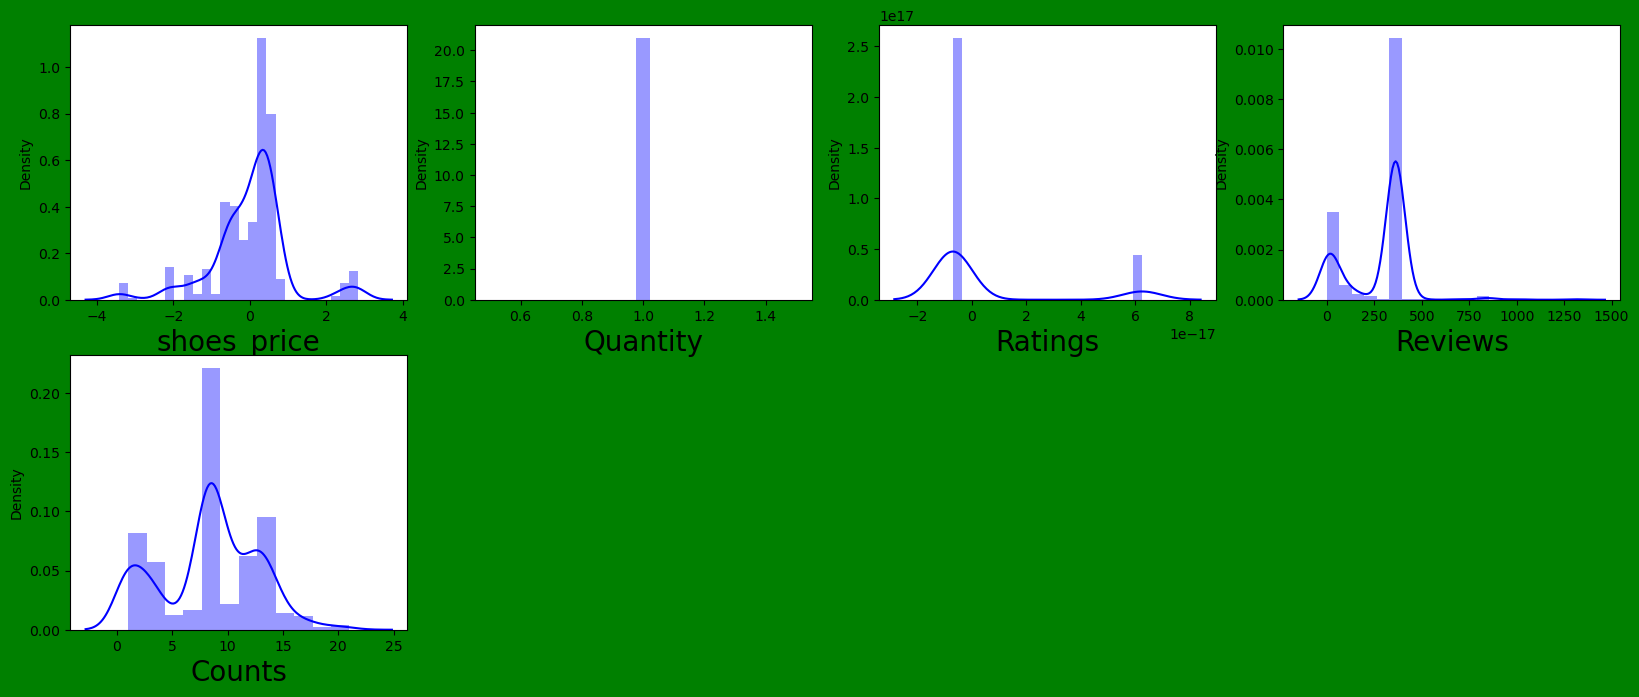

In [28]:
plt.figure (figsize=(20, 25), facecolor='green') #despite the fact that distplot will be depricated, am trying out this. 
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

Since the Quantity variable has just one value which is '1 pair', am going to delete this row as it does not yield to the data
and df.corr() method is giving NaN values for this variable.

In [203]:
df.drop(['Quantity'], axis=1, inplace=True)

# CALCULATING CORRELATION COEFFICIENT


In [191]:
df.corr()

,shoes_price,Ratings,Reviews,Counts
shoes_price,1.000000,-0.048409,-0.361022,-0.335552
Ratings,-0.048409,1.000000,-0.237239,0.043843
Reviews,-0.361022,-0.237239,1.000000,0.280752
Counts,-0.335552,0.043843,0.280752,1.000000


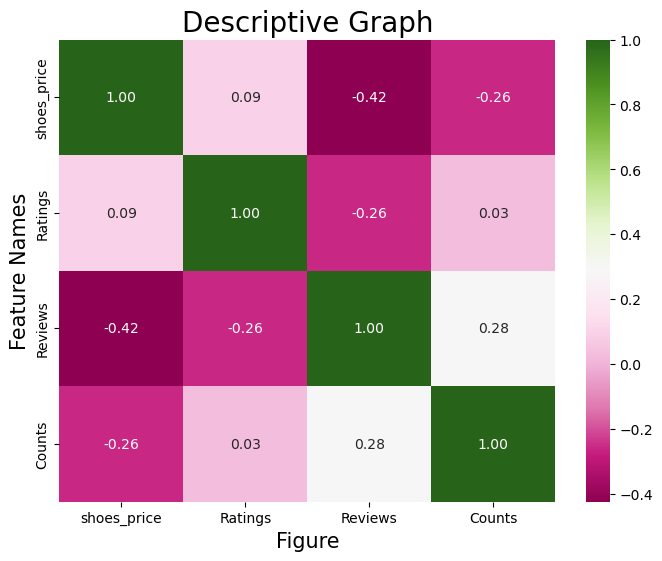

In [29]:
corr_hmap=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='PiYG')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

RESULTS:
    1. The diagonals represent the correlation of variables between themselves and hence the value is 1 and strongly correlated
    with themselves. Also the diagonal shows distribution of data.
    2. Shoes_price is positively correlated with Ratings and negatively with Reviews and Counts.
    3. Ratings is again positively correlated with Shoes_price and counts and negatively correlated with reviews.
    4. Reviews is positively correlated with just Counts and negatively with Ratings and shoes_price.
    5. Lastly, Counts is again reflective of above findings indicating positive relationship with Ratings and Reviews and negatively correlated with shoes_price

There is no multicollinearity issue here as there no similar values for any variables. So we can proceed further without deleting
any of the variables.

# ENCODING THE CATEGORICAL DATA INTO NUMERICAL DATA

In [204]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Shoes_names,shoes_category,shoes_color,shoes_price,Color1,Color2,Color3,Ratings,Reviews,Counts,StyleCode
0,8,110,2,0.582225,8,70,23,1.068590e-15,0.0,13.000000,164
3,232,37,12,0.649325,4,73,21,-1.804112e-16,0.0,13.000000,151
6,238,110,0,0.481878,10,51,27,-1.804112e-16,1.0,13.000000,153
10,231,110,2,0.539898,20,82,39,-1.804112e-16,1316.0,10.000000,105
14,256,32,5,0.502525,20,76,29,-1.804112e-16,4.0,8.540476,148


# Dividing x data and target label for further calculations

In [205]:
x=df.drop(['shoes_price'], axis=1)
x

,Shoes_names,shoes_category,shoes_color,Color1,Color2,Color3,Ratings,Reviews,Counts,StyleCode
0,8,110,2,8,70,23,1.068590e-15,0.000000,13.000000,164
3,232,37,12,4,73,21,-1.804112e-16,0.000000,13.000000,151
6,238,110,0,10,51,27,-1.804112e-16,1.000000,13.000000,153
10,231,110,2,20,82,39,-1.804112e-16,1316.000000,10.000000,105
14,256,32,5,20,76,29,-1.804112e-16,4.000000,8.540476,148
...,...,...,...,...,...,...,...,...,...,...
510,18,118,20,0,68,39,-1.804112e-16,361.561224,8.540476,181
511,395,118,20,24,68,39,-1.804112e-16,361.561224,9.000000,181
512,381,118,20,90,68,39,-1.804112e-16,361.561224,13.000000,181
513,31,118,20,47,68,39,-1.804112e-16,361.561224,9.000000,181


In [206]:
y=df['shoes_price']
y

0      0.582225
3      0.649325
6      0.481878
10     0.539898
14     0.502525
         ...   
510    0.265923
511    0.335903
512   -0.138763
513   -0.545765
514   -0.038377
Name: shoes_price, Length: 472, dtype: float64

# Scaling Techniques need to be applied with the help of StandardScaler

In [207]:
from sklearn.preprocessing import StandardScaler 
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9
0,-1.654695,1.120679,-1.348464,-0.881693,0.512149,-1.681731,2.41444,-1.627047,1.057433,0.270043
1,0.277446,-0.607254,-0.281269,-0.954239,0.671639,-1.926046,-0.41378,-1.627047,1.057433,0.043617
2,0.329199,1.120679,-1.561903,-0.845421,-0.497957,-1.193103,-0.41378,-1.621162,1.057433,0.078452
3,0.268820,1.120679,-1.348464,-0.664056,1.150111,0.272783,-0.41378,6.118541,0.372609,-0.757580
4,0.484461,-0.725605,-1.028306,-0.664056,0.831130,-0.948788,-0.41378,-1.603504,0.039437,-0.008635
...,...,...,...,...,...,...,...,...,...,...
467,-1.568439,1.310041,0.572487,-1.026785,0.405822,0.272783,-0.41378,0.500996,0.039437,0.566137
468,1.683423,1.310041,0.572487,-0.591510,0.405822,0.272783,-0.41378,0.500996,0.144334,0.566137
469,1.562664,1.310041,0.572487,0.605497,0.405822,0.272783,-0.41378,0.500996,1.057433,0.566137
470,-1.456306,1.310041,0.572487,-0.174371,0.405822,0.272783,-0.41378,0.500996,0.144334,0.566137


# VARIATION INFLATION FACTOR

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,1.155128,0
1,1.031137,1
2,3.504763,2
3,2.668475,3
4,1.923482,4
5,1.852339,5
6,1.884246,6
7,1.432595,7
8,1.699610,8
9,4.337895,9


I tried VIF method after scaling the data and the VIF values for all columns is below the threshold value of 10. So am going
to proceed with applying various regression algorithms for shoes price predictions.

Graphical representation of target variable in correlation with other variables. Ratings, stylecode and shoes_color are
positively related while others are negatively related.

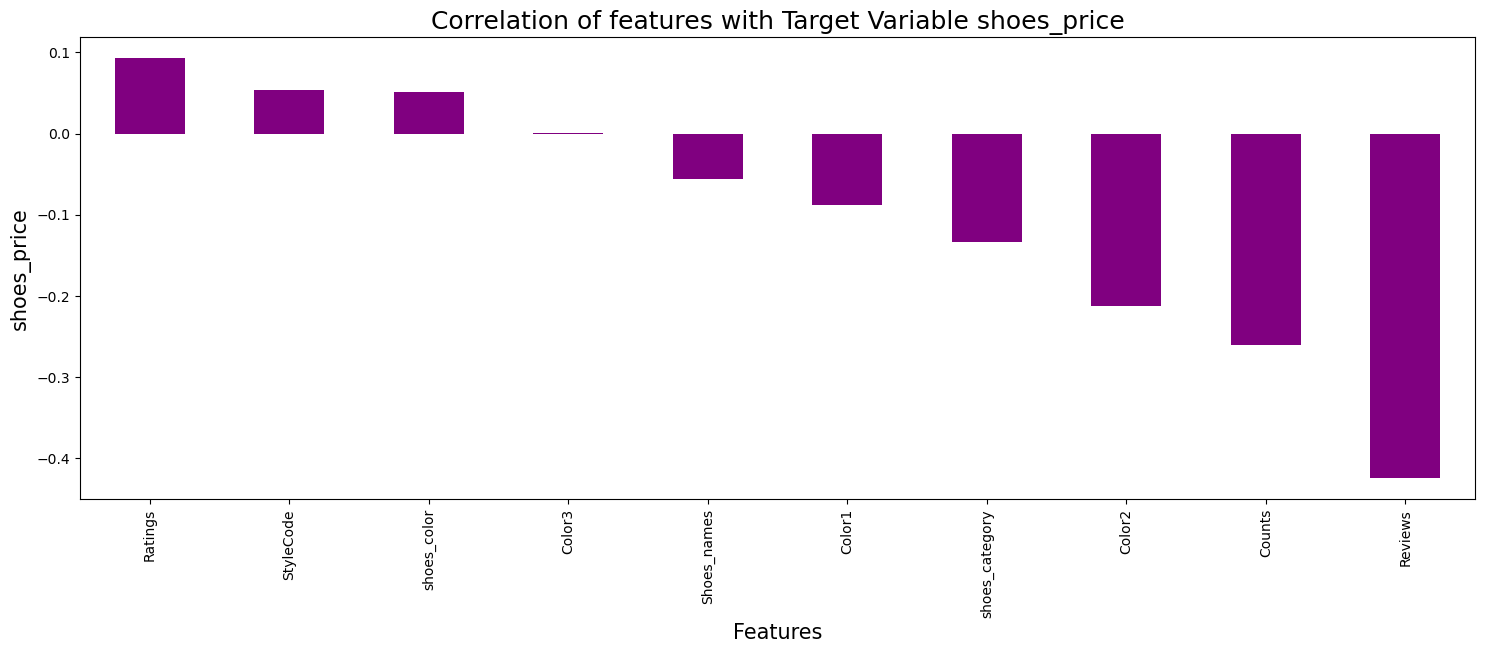

In [209]:
plt.figure(figsize = (18,6))
df.corr()['shoes_price'].drop(['shoes_price']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('shoes_price',fontsize=15)
plt.title('Correlation of features with Target Variable shoes_price',fontsize = 18)
plt.show()

# Shoes_price prediction using Regressors like linear regression, DTC, ETC, AdaBoosting, KNN etc.

# Finding the best score on random_state value and fitting for training and testing data

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [211]:
maxAcc=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is:", maxAcc, "on Random_State", maxRS)

Maximum r2_score is: 0.30455615180365114 on Random_State 181


# The maximum r2_score is 30% with random_state of 181. We can apply this random_state to all the models to learn.

# Training and Testing phase for data

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [215]:
x_train.shape

(330, 10)

In [216]:
x_test.shape

(142, 10)

In [217]:
y_train.shape

(330,)

In [218]:
y_test.shape

(142,)

# Fitting the data to different types of regressors to predict the r2 score

In [219]:
lr=LinearRegression()
lr.fit(x_train, y_train)
pred_lr=lr.predict(x_test)
print("R2_Score: ", r2_score(y_test, pred_lr))
pred_train=lr.predict(x_train)
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print("Error:")
print("Mean squared error:", mean_squared_error(y_test, pred_lr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_lr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_lr)))
      

R2_Score:  0.30455615180365114
R2_score on training data: 16.789893167009517
Error:
Mean squared error: 0.8336019081560545
Mean_absolute_error 0.6278164149200086
Root_mean_Squared_error: 0.9130180218134002


In [47]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test) 
pred_train=rfr.predict(x_train)
print('R2_score', r2_score(y_test, pred_rfr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rfr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rfr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rfr)))

R2_score 0.2396675244556219
R2_score on training data: 86.2993960783675
Mean squared error: 0.9113814207870619
Mean_absolute_error 0.6905164099980434
Root_mean_Squared_error: 0.954662988068073


In [48]:
svc=SVR()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test) 
pred_train=svc.predict(x_train)
print('R2_score', r2_score(y_test, pred_svc))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_svc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_svc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_svc)))
      

R2_score 0.23190132018963083
R2_score on training data: 27.860925227496825
Mean squared error: 0.9206904724266012
Mean_absolute_error 0.6378515768081294
Root_mean_Squared_error: 0.9595261707877494


In [49]:
knn=KNN()
knn.fit(x_train, y_train)
pred_knn=knn.predict(x_test) 
pred_train=knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_knn))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_knn))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_knn)))
      

R2_score 0.23815155073474759
R2_score on training data 38.42004983743723
Mean squared error: 0.913198560430633
Mean_absolute_error 0.7009783639059083
Root_mean_Squared_error: 0.955614232015531


In [50]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train, y_train)
pred_dtc=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_dtc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_dtc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_dtc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_dtc)))
      

R2_score -0.200301361257349
R2_score on training data 100.0
Mean squared error: 1.4387552750685024
Mean_absolute_error 0.8264747251168605
Root_mean_Squared_error: 1.1994812524873002


In [51]:
la=Lasso()
la.fit(x_train, y_train)
pred_la=la.predict(x_test) 
pred_train=la.predict(x_train)
print('R2_score', r2_score(y_test, pred_la))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_la))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_la))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_la)))

R2_score -0.0021215373391894055
R2_score on training data 0.0
Mean squared error: 1.2012047096207426
Mean_absolute_error 0.7519147518435546
Root_mean_Squared_error: 1.0959948492674327


In [52]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test) 
pred_train=rd.predict(x_train)
print('R2_score', r2_score(y_test, pred_rd))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rd))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rd))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rd)))
      

R2_score 0.3042166995414818
R2_score on training data 16.788978252018183
Mean squared error: 0.8340087965830729
Mean_absolute_error 0.6277693489618361
Root_mean_Squared_error: 0.9132408206946692


# Linear Regression and Ridge both give 30% r2 score and respective errors. 

# Cross-Validation_score()

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
score=cross_val_score(lr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_lr)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.6741175696915476


In [55]:
score2=cross_val_score(rfr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_rfr)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.6092268471098548


In [56]:
score3=cross_val_score(knn, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_knn)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.6077108733889807


In [57]:
score4=cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_dtc)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.169257961396884


In [58]:
score5=cross_val_score(la, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_la)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.3674377853150435


In [60]:
score6=cross_val_score(rd, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_rd)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.6737760221957148


In [61]:
score7=cross_val_score(svc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", r2_score(y_test, pred_svc)-score.mean())

[-10.29035043  -1.03615735  -0.15933787  -0.18655759  -0.17539338]
-2.369559322654233
Difference between R2 Score and cross validation score is: 2.601460642843864


I will go ahead with Linear Regression as all the values of r2 score are same and negative which means data is underfitting and
there are errors to be eradicated.

# GridsearchCV for maximization of the result

In [65]:
from sklearn.model_selection import GridSearchCV
#For LinearRegression()
parameters={'fit_intercept':[True], 'copy_X':[True], 'n_jobs':[None], 'positive':[False]}

In [66]:
GCV=GridSearchCV(lr, parameters, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'positive': [False]})

In [67]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# My new model

In [68]:
Model=LinearRegression()
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean_absolute_error", mean_absolute_error(y_test, pred))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred)))
      

R2_score 0.3045582470373146
R2_score on training data 16.788978252018183
Mean squared error: 0.833599396679701
Mean_absolute_error 0.6278159042944497
Root_mean_Squared_error: 0.9130166464417289


# R2_score is 30% and R2_score on training data is just 16%, which is very less. The respectivemean_squared_error is 0.8, mean_absolute_error is 0.6, root_mean_squared_error is 0.9.

# Saving the model using Joblib method


In [69]:
import joblib
joblib.dump(lr, 'shoesprice.obj')

['shoesprice.obj']

In [71]:
import pickle
filename='shoesprice.obj'
pickle.dump(Model,open(filename, 'wb'))

In [72]:
#Loading back the saved model
import joblib
Model=joblib.load('shoesprice.obj')

result=Model.score(x_test, y_test)
print(result*100)

#oaded model to make predictions
Model.predict(x_test)

30.45582470373146


array([-1.80727473e-01,  4.04763186e-01, -3.78503883e-02, -1.55193169e-01,
        5.78116039e-01, -9.93557289e-02, -2.11142742e-01, -4.75964580e-02,
       -1.95716960e-02,  9.45905043e-01, -4.19236669e-01, -1.59404720e-01,
        8.53080417e-01, -3.66567145e-01,  9.03613899e-01,  6.90235465e-01,
       -1.44847431e-01,  5.35386944e-01, -3.19943094e-01, -3.27270062e-01,
       -4.03664236e-01, -3.38927282e-01, -2.14612312e-01, -1.42606849e-01,
       -7.40307713e-02, -1.42158712e-01, -1.62011135e-02,  7.00642575e-01,
        4.37301521e-01,  4.43175527e-01, -7.94994249e-01, -2.42558997e-01,
       -2.45634756e-01, -4.67961436e-01, -4.72121330e-01,  9.42240811e-01,
       -3.18628942e-01, -3.30250788e-01, -2.15698104e-01, -1.03286690e-01,
       -3.09929233e-01, -2.07342947e-01, -2.62625533e-01, -2.86408751e-01,
       -6.66389244e-02, -1.96283744e-03,  6.15193850e-01,  2.97390771e-01,
       -1.46470214e-01,  2.34691023e-01, -2.77849603e-01, -7.79337335e-02,
       -1.40721319e-01,  

# Considering the second target as Ratings to predict star Ratings.

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [221]:
x=df.drop(['Ratings'], axis=1)
x

,Shoes_names,shoes_category,shoes_color,shoes_price,Color1,Color2,Color3,Reviews,Counts,StyleCode
0,8,110,2,0.582225,8,70,23,0.000000,13.000000,164
3,232,37,12,0.649325,4,73,21,0.000000,13.000000,151
6,238,110,0,0.481878,10,51,27,1.000000,13.000000,153
10,231,110,2,0.539898,20,82,39,1316.000000,10.000000,105
14,256,32,5,0.502525,20,76,29,4.000000,8.540476,148
...,...,...,...,...,...,...,...,...,...,...
510,18,118,20,0.265923,0,68,39,361.561224,8.540476,181
511,395,118,20,0.335903,24,68,39,361.561224,9.000000,181
512,381,118,20,-0.138763,90,68,39,361.561224,13.000000,181
513,31,118,20,-0.545765,47,68,39,361.561224,9.000000,181


In [222]:
y=df['Ratings']
y

0      1.068590e-15
3     -1.804112e-16
6     -1.804112e-16
10    -1.804112e-16
14    -1.804112e-16
           ...     
510   -1.804112e-16
511   -1.804112e-16
512   -1.804112e-16
513   -1.804112e-16
514   -1.804112e-16
Name: Ratings, Length: 472, dtype: float64

In [223]:
from sklearn.preprocessing import StandardScaler 
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9
0,-1.654695,1.120679,-1.348464,0.582225,-0.881693,0.512149,-1.681731,-1.627047,1.057433,0.270043
1,0.277446,-0.607254,-0.281269,0.649325,-0.954239,0.671639,-1.926046,-1.627047,1.057433,0.043617
2,0.329199,1.120679,-1.561903,0.481878,-0.845421,-0.497957,-1.193103,-1.621162,1.057433,0.078452
3,0.268820,1.120679,-1.348464,0.539898,-0.664056,1.150111,0.272783,6.118541,0.372609,-0.757580
4,0.484461,-0.725605,-1.028306,0.502525,-0.664056,0.831130,-0.948788,-1.603504,0.039437,-0.008635
...,...,...,...,...,...,...,...,...,...,...
467,-1.568439,1.310041,0.572487,0.265923,-1.026785,0.405822,0.272783,0.500996,0.039437,0.566137
468,1.683423,1.310041,0.572487,0.335903,-0.591510,0.405822,0.272783,0.500996,0.144334,0.566137
469,1.562664,1.310041,0.572487,-0.138763,0.605497,0.405822,0.272783,0.500996,1.057433,0.566137
470,-1.456306,1.310041,0.572487,-0.545765,-0.174371,0.405822,0.272783,0.500996,0.144334,0.566137


In [224]:
df['Ratings'].astype(int)

0      0
3      0
6      0
10     0
14     0
      ..
510    0
511    0
512    0
513    0
514    0
Name: Ratings, Length: 472, dtype: int32

# Converting multiclass to binary class.

In [225]:
df.loc[df.Ratings!=1,'Type']=0
df.loc[df.Ratings==1, 'Type']=1

In [67]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def Ratings(rating):

    if (rating==0):
        print("Poor")
    elif (rating==3):
        print("Good")
    elif (rating==4):
        print("Very good")
    elif (rating==5):
        print('Excellent')
        
        

In [245]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1, y1=smt.fit_resample(x, y)

ValueError: Unknown label type: 'continuous'

In [226]:
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

ValueError: Unknown label type: 'continuous'

In [140]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.33, random_state=)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
pred_lg=lg.predict(x_test)
print('Accuracy_Score:', accuracy_score(y_test, pred_lg))
print('Confusion Matrix is', confusion_matric(y_test, preg_lg))
print('Classification Report is', classification_report(y_test, preg_lg))